# The Idea

*   Using different labelled data of various sentences and statements  making a model to predict the meaning or intent of the statement

*   The predicted classification of intent can be used a a ground intent be various AI-Chatbots and applications for checking the general intent of the user and transfer user to the revelant protocol.

*   I used avaliable data sets of : 

        1. Converation(intent detection chat-bot data) for greeting and conversation statements

        2.  Movie Review data set for sattements of review

        3.  Real and Fake news Data set for News statements(facts)

        4. Emotion Data set for satatements defining Emotions 

* I created novel data set combining these dfferent data sets, which was then used to produce a DL (ANN) model.




### For the  data cleaning and preprocessing part please refer to the Data Pre-processing and Data Normalization Notebooks along with their different data sets

*   Since we already know there exist a relation between text and Intent we do not need other columns HENCE ALL OTHER COLUMNS HAVE BEEN DROPPED IN PREPROCESSSING




Installing different libraries

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 29.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:

pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 55.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from wordcloud import WordCloud
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import one_hot

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns
import matplotlib.pyplot as plt

# from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup

In [ ]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Reading the data

In [ ]:
# df1= pd.read_csv("/content/data_project_processed.csv")
df= pd.read_csv("/content/data__norm_project.csv")
df=df.drop(['Unnamed: 0'], axis=1)
df

,text,intent_ovr
0,Trump's immigration outrage poses challenge fo...,facts
1,Nearly half of Americans ‘very concerned’ abou...,facts
2,U.S. infrastructure legislation back on Congre...,facts
3,U.S. House clears way to debate Republican hea...,facts
4,Senate Republican signals possible committee '...,facts
...,...,...
49888,are you asleep,convo
49889,have you turned off,convo
49890,have you stopped,convo
49891,did you stop,convo


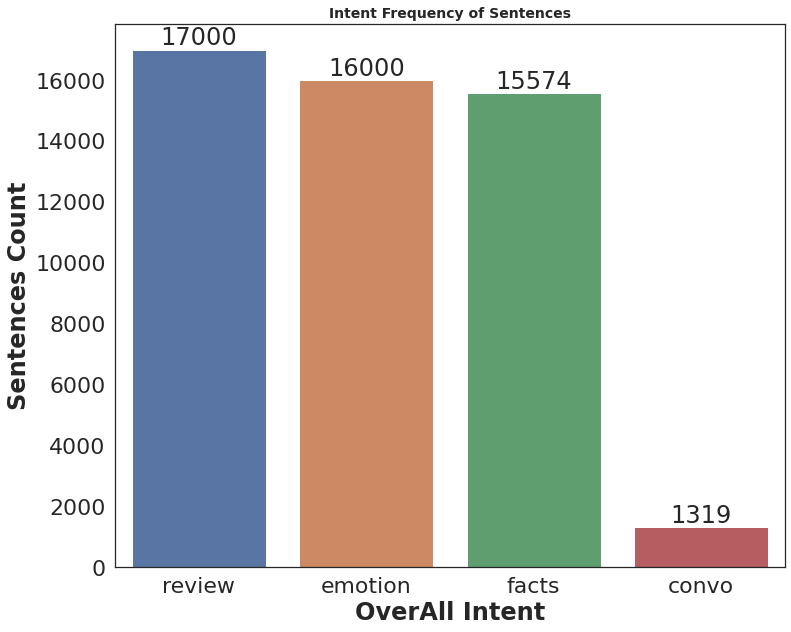

In [ ]:

plt.rcParams['figure.figsize'] = (12, 10) #increase figure size
sns.set(style='white', font_scale=2) #set stylem
 
# count plot on single categorical variable
# sns.countplot(x ='intent_ovr', data = df)
ax = sns.countplot(x=df['intent_ovr'],
                   order=df['intent_ovr'].value_counts(ascending=False).index);

abs_values = df['intent_ovr'].value_counts(ascending=False).values
ax.set_xlabel('OverAll Intent', 
               fontweight ='bold')
ax.set_ylabel('Sentences Count', 
               fontweight ='bold')
ax.set_title('Intent Frequency of Sentences', fontsize = 14, fontweight ='bold')
ax.bar_label(container=ax.containers[0], labels=abs_values)
 
# Show the plot
plt.show()

### Checking if there is any co-relation between lenght of the sentences and the intent.

*   max length is ued to determine the input sise to the model




In [ ]:
df['length'] = [len(x) for x in df['text']]
df.sample(10)

,text,intent_ovr,length
47930,i have to admit i m feeling a little victimized,emotion,47
1018,Senator Warren aide said to be in running for ...,facts,62
23806,can analyze this movie in three words : Thumbs...,review,61
35549,i remember sitting in class actually feeling e...,emotion,67
14610,New Accuser Confirms She Got Roy Moore Banned...,facts,69
22250,hijacks the heat of revolution and turns it in...,review,61
44719,i must not be left to feel foolish lost unhapp...,emotion,65
22031,A spiffy animated feature,review,25
26522,utterly satisfied to remain the same throughout,review,47
31886,wish we could have spent more time in its world,review,47


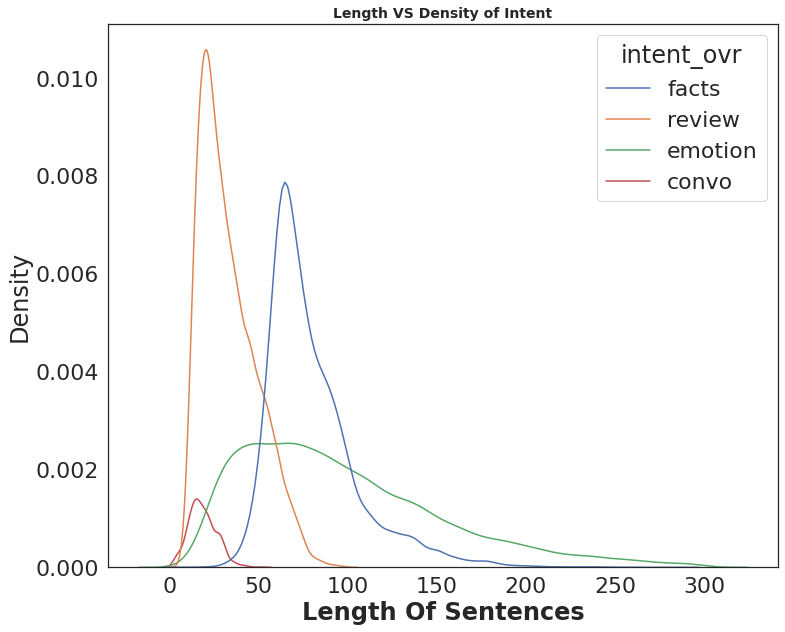

In [ ]:
fig = plt.figsize=(30,10)
ax=sns.kdeplot(data=df,x='length',hue='intent_ovr')
ax.set_xlabel('Length Of Sentences', 
               fontweight ='bold')

ax.set_title('Length VS Density of Intent', fontsize = 14, fontweight ='bold')

plt.show()

In [ ]:
intent_list = df['intent_ovr'].unique()
intent_list

array(['facts', 'review', 'emotion', 'convo'], dtype=object)

## Creating A word-cloud understand the different words and thier frequency and effect over the model.

*   This gives us an immediate picture of the vocablury in the sentences




In [ ]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 22,fontweight ='bold')
    
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

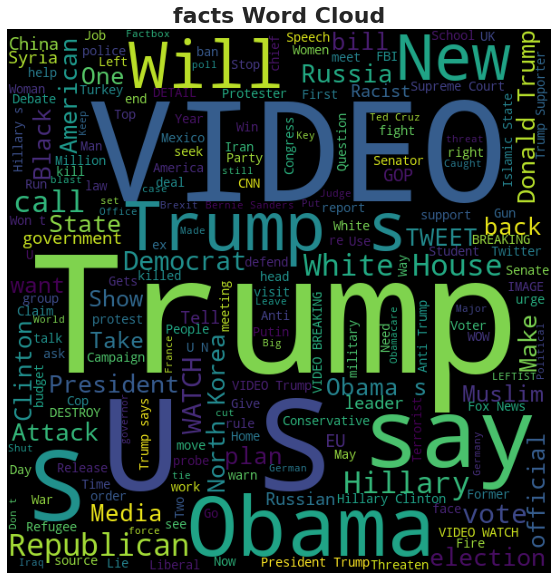

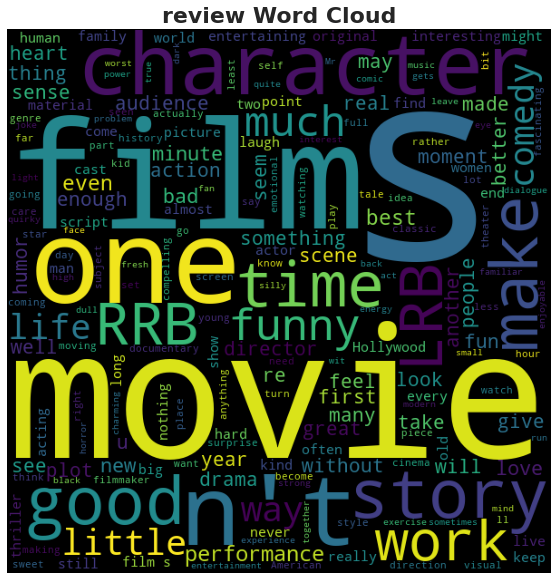

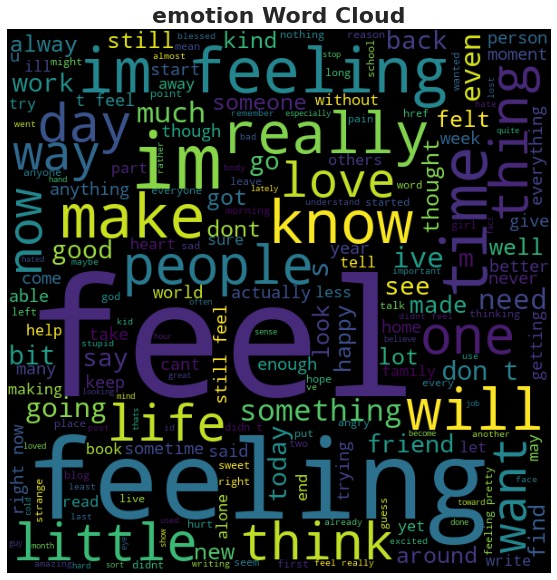

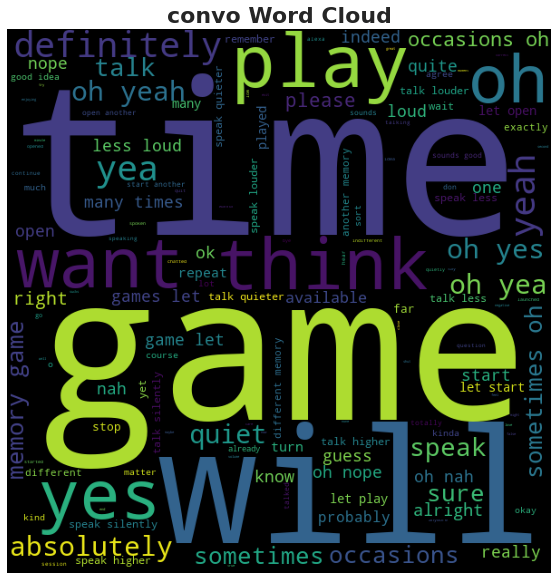

In [ ]:
for intent in intent_list:
    text = ' '.join([sentence for sentence in df.loc[df['intent_ovr'] == intent,'text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, intent)

## Encoding the intent_ovr to fit in with the model

*   Each Number Denotes different intent

1.   Emotion
2.   Fact
3.   Review
4.   Convo






In [ ]:
lb = LabelEncoder()
df['intent_ovr'] = lb.fit_transform(df['intent_ovr'])
df.sample(10)

,text,intent_ovr,length
29019,"I liked the movie ,",3,19
39408,im just feeling rebellious,1,26
34176,i spent all day the other day feeling very mor...,1,115
34616,i did not feel its strange effects no more,1,42
37297,i ask him if he is feeling adventurous and wan...,1,169
11361,GERMAN VOLUNTEERS HOLD WELCOME RALLY: Applaud ...,2,92
49487,may be,0,6
18417,"intelligent , and humanly funny film",3,36
49111,oh yes kinda,0,12
28851,these words have ever been together in the sam...,3,56


In [ ]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(pd.concat(X_train, axis=0))

Creating A Max Vocab Size:

In [ ]:
vocabSize = 11000

In [ ]:
max_len=df['length'].max()
max_len

300

## Text Cleaning and Lemantization
* Text cleaning involves

    1. Lowecasing the data
    2. Removing Puncuatations
    3. Removing Numbers
    4. Removing extra space

*  Lemmatization is a text normalization technique that switches any kind of a word to its base root mode. 




In [ ]:

def text_cleaning(df, column):
    """Removing unrelevent chars, lementing Stemming and padding"""
    # stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

    # pos_tagged_text = nltk.pos_tag(text.split())
    corpus = []
    
    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        # text = text.split()
        pos_tagged_text=nltk.pos_tag(text.split())
        # text = [stemmer.stem(word) for word in text if word not in stopwords]
        text= [lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=vocabSize) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_len,padding='pre')
    print(pad.shape)
    return pad

## Spitting Data Into Testing and Traning

In [ ]:

# split the data into train and test set
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

Passing to get the clean text

In [ ]:
x_train = text_cleaning(train, "text")

(39914, 300)


In [ ]:
x_test = text_cleaning(test, "text")

(9979, 300)


In [ ]:
y_train = train["intent_ovr"]
y_test = test["intent_ovr"]

Conveting numbers to categorical values

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Building





We will use a simple Sequential model with

*    Input layer with input dimentions 300(equal to max lenth)

*   LSTM layer that learns to predict the future from sequences of variable lengths.

*    Dense layer using sigmoid activation

*    Dense output layer using softmax function



In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocabSize,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          1650000   
                                                                 
 dropout (Dropout)           (None, 300, 150)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2

In [ ]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
# callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
# hist = model.fit(x_train,y_train,epochs=10,batch_size=64, verbose=1, callbacks=[callback])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
281/281 [==============================] - 13s 27ms/step - loss: 0.3590 - accuracy: 0.8711 - val_loss: 0.1080 - val_accuracy: 0.9719
Epoch 2/10
281/281 [==============================] - 7s 25ms/step - loss: 0.0750 - accuracy: 0.9820 - val_loss: 0.0642 - val_accuracy: 0.9825
Epoch 3/10
281/281 [==============================] - 7s 26ms/step - loss: 0.0408 - accuracy: 0.9904 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 4/10
281/281 [==============================] - 7s 26ms/step - loss: 0.0239 - accuracy: 0.9943 - val_loss: 0.0516 - val_accuracy: 0.9875
Epoch 5/10
281/281 [==============================] - 7s 26ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.0563 - val_accuracy: 0.9865
Epoch 6/10
281/281 [==============================] - 7s 26ms/step - loss: 0.0126 - accuracy: 0.9972 - val_loss: 0.0778 - val_accuracy: 0.9822
Epoch 7/10
281/281 [==============================] - 7s 26ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0579 - val_accuracy: 0.986

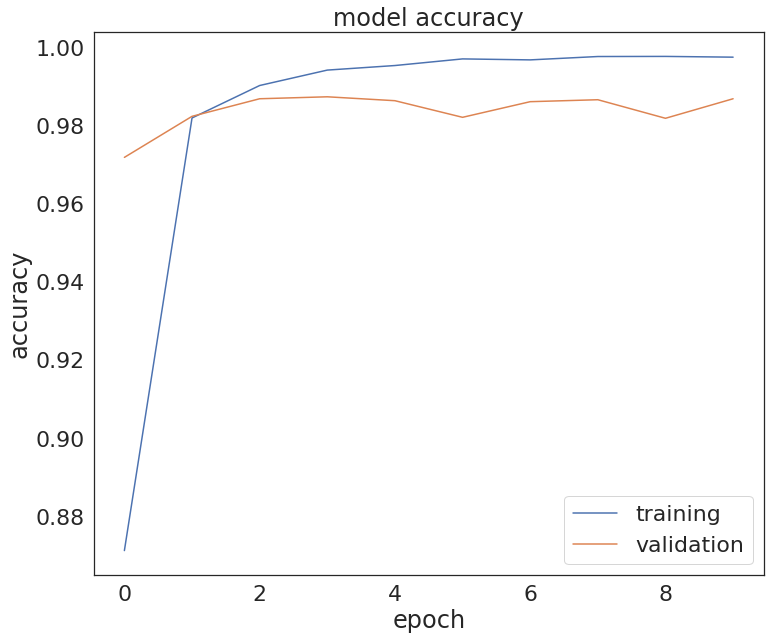

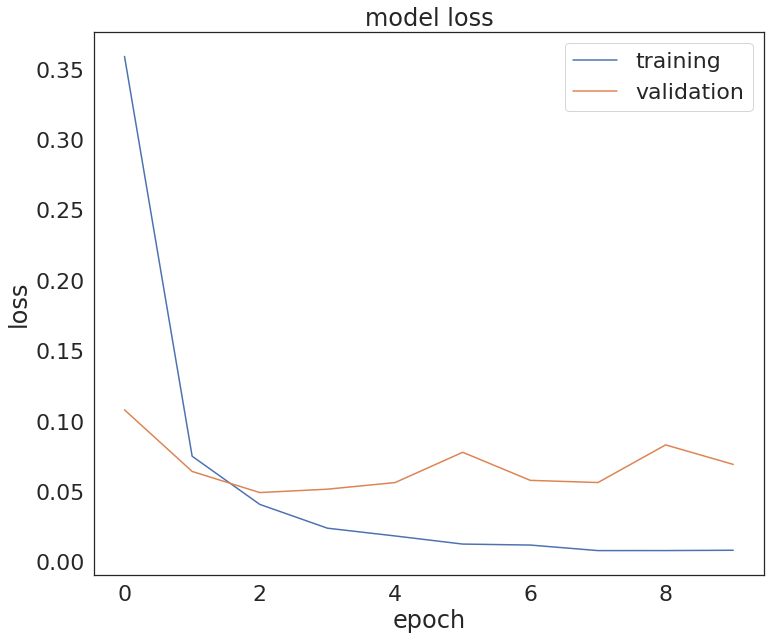

Test loss: 0.0529
Test accuracy: 0.989


In [ ]:
plot_training_history(history, model)

In [ ]:
model.evaluate(x_test,y_test,verbose=1) 

312/312 [==============================] - 2s 7ms/step - loss: 0.0529 - accuracy: 0.9888


[0.05292104557156563, 0.988776445388794]

### Saving the model 
* faster re-use need not compute the entire model again.

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 150)          1650000   
                                                                 
 dropout (Dropout)           (None, 300, 150)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               142848    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2

In [ ]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

312/312 - 3s - loss: 0.0529 - accuracy: 0.9888 - 3s/epoch - 9ms/step
Restored model, accuracy: 98.88%


# Conclusion

We have been able to classify differen sentences with an accuracy of 98.88% into our Categories of Conversation, Emotion, News or Review.

We were able to identify the words and the biases of the length for various sentences. 

1.   Word-Cloud giving us an understanding of the most frequently used words in general statement of a kind.
2.   Lengths of sentences have a crucial part to play in sattement analysis.

This novel model and dataset can be used for further work in training chatbots and other intent classifing applications to get an understanding of the user intent make better automated desicions


